In [3]:
# 머신러닝은 데이터 분석을 통한 인사이트 도출이 중요
# 진짜 데이터로 하는게 의미가 있음

### 타이타닉 생존자 예측

In [4]:
# 귀무가설 : 사망자는 서실등급,성별에 영향을 받지 않는다.
#  p-value 0.05 는 다르다!

In [5]:
# 가장 먼저 분석할 가치가 있는가? 판단
# histrogram(도수분포표) : 구간을 나누어 데이터별 빈도를 나타냄

In [6]:
# KB 경영연구소처럼 보고서 쓰기쓰기

In [8]:
!pip show numpy

Name: numpy
Version: 1.23.5
Summary: NumPy is the fundamental package for array computing with Python.
Home-page: https://www.numpy.org
Author: Travis E. Oliphant et al.
Author-email: 
License: BSD
Location: C:\Users\user\miniconda3\envs\py\Lib\site-packages
Requires: 
Required-by: contourpy, h5py, jax, matplotlib, mkl-fft, mkl-random, ml-dtypes, opt-einsum, pandas, scikit-learn, scipy, seaborn, tensorboard, tensorflow-intel


In [9]:
pip freeze

absl-py==1.4.0
anyio @ file:///C:/ci_311/anyio_1676425491996/work/dist
argon2-cffi @ file:///opt/conda/conda-bld/argon2-cffi_1645000214183/work
argon2-cffi-bindings @ file:///C:/ci_311/argon2-cffi-bindings_1676424443321/work
asttokens @ file:///opt/conda/conda-bld/asttokens_1646925590279/work
astunparse==1.6.3
async-generator==1.10
attrs @ file:///C:/ci_311/attrs_1676422272484/work
Babel @ file:///C:/ci_311/babel_1676427169844/work
backcall @ file:///home/ktietz/src/ci/backcall_1611930011877/work
beautifulsoup4 @ file:///C:/b/abs_0agyz1wsr4/croot/beautifulsoup4-split_1681493048687/work
bleach @ file:///opt/conda/conda-bld/bleach_1641577558959/work
brotlipy==0.7.0
cachetools==5.3.1
certifi==2023.5.7
cffi @ file:///C:/ci_311/cffi_1676423759166/work
charset-normalizer @ file:///tmp/build/80754af9/charset-normalizer_1630003229654/work
colorama @ file:///C:/ci_311/colorama_1676422310965/work
comm @ file:///C:/ci_311/comm_1678376562840/work
contourpy==1.0.7
cryptography @ file:///C:/ci_311/c

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

baseFolder = 'titanic/'
titanic_df = pd.read_csv(baseFolder+'train.csv')
titanic_df.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [2]:
# random하게 데이터를 5개만 보겠다
titanic_df.sample(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
621,622,1,1,"Kimball, Mr. Edwin Nelson Jr",male,42.0,1,0,11753,52.5542,D19,S
148,149,0,2,"Navratil, Mr. Michel (""Louis M Hoffman"")",male,36.5,0,2,230080,26.0000,F2,S
299,300,1,1,"Baxter, Mrs. James (Helene DeLaudeniere Chaput)",female,50.0,0,1,PC 17558,247.5208,B58 B60,C
731,732,0,3,"Hassan, Mr. Houssein G N",male,11.0,0,0,2699,18.7875,NaN,C
732,733,0,2,"Knight, Mr. Robert J",male,NaN,0,0,239855,0.0000,NaN,S


In [3]:
###
import random

print(titanic_df.shape)

numberlist = []

for x in range(5):
    numberlist.append(random.randint(0,titanic_df.shape[0]))

(891, 12)


In [4]:
titanic_df.iloc[numberlist,:]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
83,84,0,1,"Carrau, Mr. Francisco M",male,28.0,0,0,113059,47.1000,NaN,S
308,309,0,2,"Abelson, Mr. Samuel",male,30.0,1,0,P/PP 3381,24.0000,NaN,C
654,655,0,3,"Hegarty, Miss. Hanora ""Nora""",female,18.0,0,0,365226,6.7500,NaN,Q
76,77,0,3,"Staneff, Mr. Ivan",male,NaN,0,0,349208,7.8958,NaN,S
323,324,1,2,"Caldwell, Mrs. Albert Francis (Sylvia Mae Harb...",female,22.0,1,1,248738,29.0000,NaN,S


In [5]:
# List Comprehension

numberlist = [random.randint(0,titanic_df.shape[0]) for x in range(5)]
titanic_df.iloc[numberlist,:]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
626,627,0,2,"Kirkland, Rev. Charles Leonard",male,57.0,0,0,219533,12.3500,NaN,Q
117,118,0,2,"Turpin, Mr. William John Robert",male,29.0,1,0,11668,21.0000,NaN,S
515,516,0,1,"Walker, Mr. William Anderson",male,47.0,0,0,36967,34.0208,D46,S
299,300,1,1,"Baxter, Mrs. James (Helene DeLaudeniere Chaput)",female,50.0,0,1,PC 17558,247.5208,B58 B60,C
567,568,0,3,"Palsson, Mrs. Nils (Alma Cornelia Berglund)",female,29.0,0,4,349909,21.0750,NaN,S


In [6]:
def myRandom(data,Num=5):

    if type(0) != type(Num):
        return print("Type Error")

    import random

    dataLength = len(data)

    if Num > dataLength :
        print("Data OverFlow!!!")
    else:
        numberlist = [random.randint(0,dataLength) for x in range(Num)]
        display(data.iloc[numberlist,:])

myRandom(titanic_df,'10')

Type Error


In [7]:
def myRandom(data,Num=5):

    try :
        import random

        dataLength = len(data)

        if Num > dataLength :
            print("Data OverFlow!!!")
        else:
            numberlist = [random.randint(0,dataLength) for x in range(Num)]
            display(data.iloc[numberlist,:])

    except Exception as e:
        print("Type Error")
        print("Exception : ",e)
        print(e.__class__)
        print(e.__cause__)
        print(e.__context__)

myRandom(titanic_df,'10')

Type Error
Exception :  '>' not supported between instances of 'str' and 'int'
<class 'TypeError'>
None
None


In [8]:
titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [10]:
### 데이터 상관계수 
# 생사여부, PClass

# 피어슨 상관 계수
# 1은 완벽한 상관 관계, 0은 상관 관계 없음
pearson_df = titanic_df[['Pclass','Survived']].corr(method='pearson')
pearson_df

,Pclass,Survived
Pclass,1.000000,-0.338481
Survived,-0.338481,1.000000


In [11]:
titanic_df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [12]:
type(titanic_df.dtypes)

pandas.core.series.Series

In [13]:
titanic_df.dtypes[0] , type(titanic_df.dtypes[0]), len(titanic_df.dtypes)

(dtype('int64'), numpy.dtype[int64], 12)

drop!
drop!
drop!
drop!
drop!
['Name', 'Sex', 'Ticket', 'Cabin', 'Embarked']


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.005007,-0.035144,0.036847,-0.057527,-0.001652,0.012658
Survived,-0.005007,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307
Pclass,-0.035144,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500
Age,0.036847,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067
SibSp,-0.057527,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651
Parch,-0.001652,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225
Fare,0.012658,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000


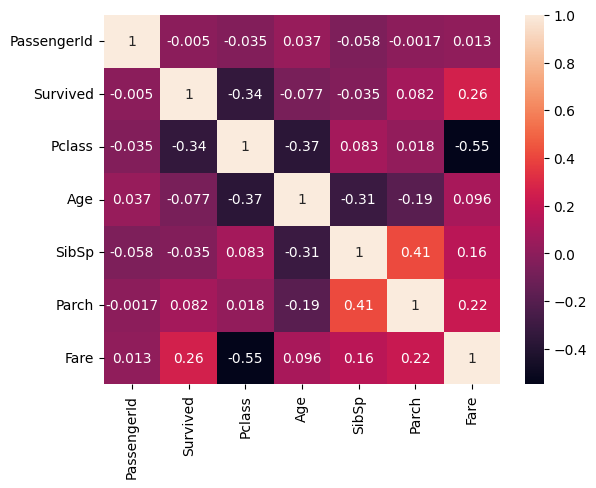

In [15]:
#### df 의 자료형이 int32,int64,float32,float64

def get_corr(df):
    
    dropList = []
    for i in range(len(df.dtypes)):
        if df.dtypes[i] == 'object':
            print("drop!")
            dropList.append(df.columns[i])
    
    df = df.drop(columns = dropList)
    print(dropList)

    df.corr(method='pearson').to_csv('df_corr.csv')

    import seaborn as sns

    df_corr = df.corr()

    heatmap_df_corr = sns.heatmap(df_corr,annot=True)

    heatmap_df_corr.figure.savefig("heatmap_df_corr.png")

    return df, df.corr(method='pearson')

df, df_corr = get_corr(titanic_df)

# 엄밀히는 연관성이 있는 것은 아님
# 상관관계가 인과관계를 의미하는 것은 아님

df_corr

### 상관계수 시각화

<Axes: >

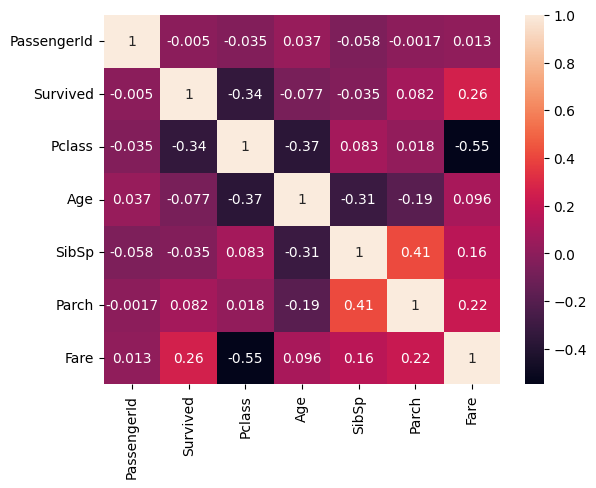

In [16]:
import seaborn as sns

sns.heatmap(df_corr,annot=True)

### Nan 처리

In [17]:
np.nan

nan

In [18]:
# nan값 포함되면 sum() 시 nan

d = [np.nan,2,1]
sum(d) , np.mean(d)

(nan, nan)

In [19]:
# np.nan 연산 
# pandas는 기본값으로 dropna=True이기때문에 NaN 은 빼고 연산함

np.nansum(d), np.nanmean(d)

(3.0, 1.5)

In [20]:
data = pd.DataFrame({'name':d})
data

,name
0,NaN
1,2.0
2,1.0


In [21]:
data['name'].sum() , data['name'].mean()

(3.0, 1.5)

In [22]:
d1 = [np.nan,2,1]
d2 = [3,4,5]

data1 = pd.DataFrame({'name1':d1,'name2':d2})
data1

,name1,name2
0,NaN,3
1,2.0,4
2,1.0,5


In [23]:
data1.corr()

,name1,name2
name1,1.0,-1.0
name2,-1.0,1.0


In [24]:
a = titanic_df[['Age','Fare']]
a[:6].corr()

,Age,Fare
Age,1.000000,0.730448
Fare,0.730448,1.000000


### 결측치 데이터

In [25]:
# 결측치 데이터는 머신러닝에서 계산이 불가하기 때문에 에러
# 결측치 있는 행 데이터 제거 or 어떠한 값으로 대체 (0, 임의의 값을 지정, 예측값을 넣거나 평균값 or 중앙값으로 대체)

# 결측치 시각화 작업! 

In [28]:
# pandas 결측치 갯수 확인

tmp = titanic_df.isna().sum()
tmp

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

<BarContainer object of 12 artists>

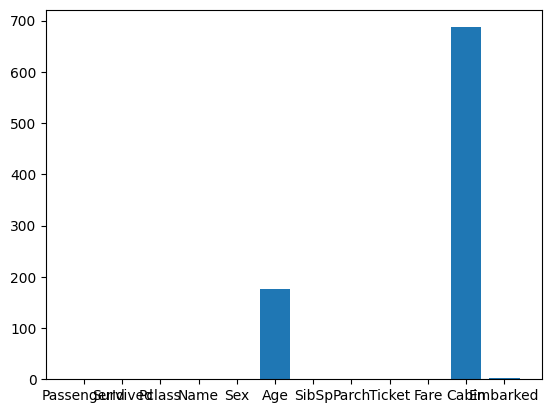

In [29]:
plt.bar(tmp.index,tmp)

<BarContainer object of 12 artists>

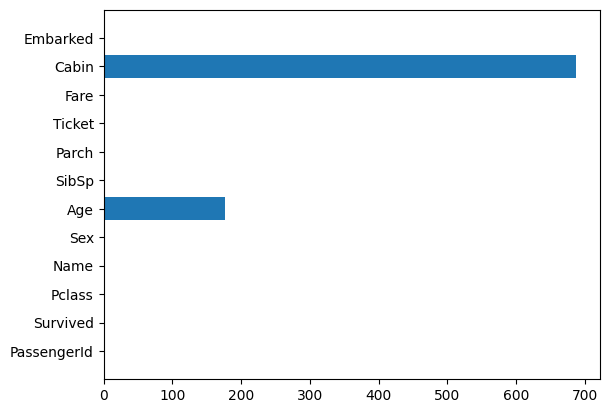

In [30]:
# 글자가 다 보이게 barh 그래프씀
plt.barh(tmp.index,tmp)

drop!
drop!
drop!
drop!
drop!
['Name', 'Sex', 'Ticket', 'Cabin', 'Embarked']


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.005007,-0.035144,0.038125,-0.057527,-0.001652,0.012658
Survived,-0.005007,1.000000,-0.338481,0.010539,-0.035322,0.081629,0.257307
Pclass,-0.035144,-0.338481,1.000000,-0.361353,0.083081,0.018443,-0.549500
Age,0.038125,0.010539,-0.361353,1.000000,-0.184664,-0.048786,0.135516
SibSp,-0.057527,-0.035322,0.083081,-0.184664,1.000000,0.414838,0.159651
Parch,-0.001652,0.081629,0.018443,-0.048786,0.414838,1.000000,0.216225
Fare,0.012658,0.257307,-0.549500,0.135516,0.159651,0.216225,1.000000


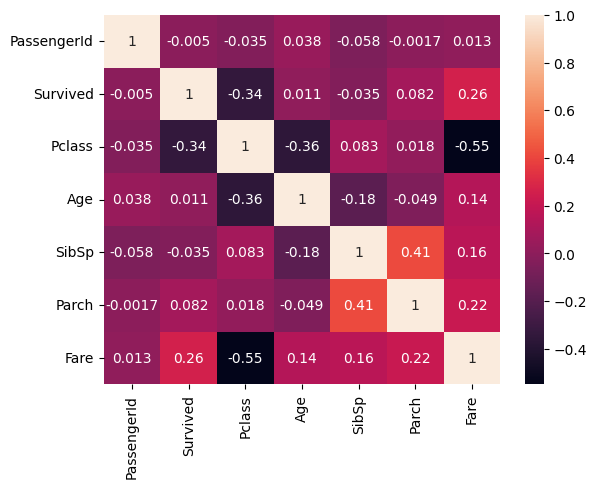

In [31]:
titanic_df['Age'].fillna(0,inplace=True)

titanic_df['Cabin'].fillna('N',inplace=True)
titanic_df['Embarked'].fillna('N',inplace=True)
titanic_df['Fare'].fillna(0,inplace=True)

df, df_corr = get_corr(titanic_df)
df_corr

In [32]:
titanic_df['Sex'].value_counts()

Sex
male      577
female    314
Name: count, dtype: int64

<Axes: ylabel='Sex'>

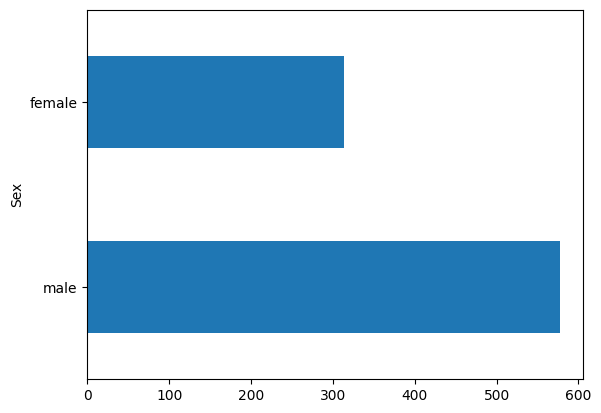

In [33]:
titanic_df['Sex'].value_counts().plot.barh()

In [34]:
titanic_df['Sex'].values

array(['male', 'female', 'female', 'female', 'male', 'male', 'male',
       'male', 'female', 'female', 'female', 'female', 'male', 'male',
       'female', 'female', 'male', 'male', 'female', 'female', 'male',
       'male', 'female', 'male', 'female', 'female', 'male', 'male',
       'female', 'male', 'male', 'female', 'female', 'male', 'male',
       'male', 'male', 'male', 'female', 'female', 'female', 'female',
       'male', 'female', 'female', 'male', 'male', 'female', 'male',
       'female', 'male', 'male', 'female', 'female', 'male', 'male',
       'female', 'male', 'female', 'male', 'male', 'female', 'male',
       'male', 'male', 'male', 'female', 'male', 'female', 'male', 'male',
       'female', 'male', 'male', 'male', 'male', 'male', 'male', 'male',
       'female', 'male', 'male', 'female', 'male', 'female', 'female',
       'male', 'male', 'female', 'male', 'male', 'male', 'male', 'male',
       'male', 'male', 'male', 'male', 'female', 'male', 'female', 'male',
      

In [35]:
# df.value_counts()

titanic_df['Sex'].value_counts()

Sex
male      577
female    314
Name: count, dtype: int64

In [36]:
titanic_df['Sex'].value_counts().index

Index(['male', 'female'], dtype='object', name='Sex')

In [37]:
titanic_df['Sex'].value_counts().values

array([577, 314], dtype=int64)

In [38]:
tmp = titanic_df['Sex'].value_counts()

ratio = [round(x/tmp.sum()*100,2) for x in titanic_df['Sex'].value_counts().values]
ratio

[64.76, 35.24]

In [40]:
display(pd.DataFrame({'name':tmp.index,'val':tmp.values,'ratio':ratio}))

,name,val,ratio
0,male,577,64.76
1,female,314,35.24


<BarContainer object of 2 artists>

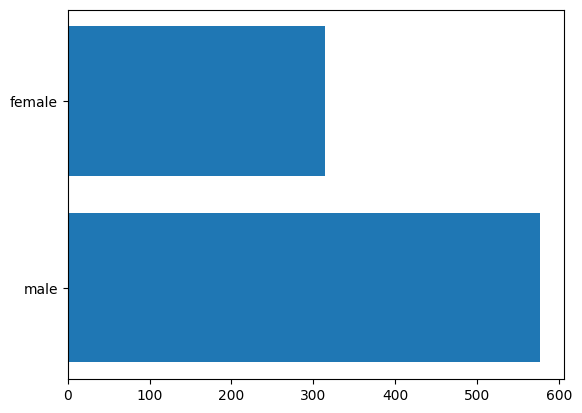

In [41]:
plt.barh(tmp.index,tmp.values)

<Axes: ylabel='count'>

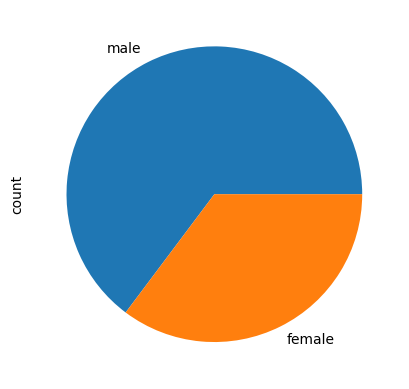

In [42]:
tmp.plot.pie()

([<matplotlib.patches.Wedge at 0x2109567e410>,
 [Text(-0.4919454136803954, 0.9838646807152012, 'male'),
  Text(0.4919455057964525, -0.9838646346559433, 'female')])

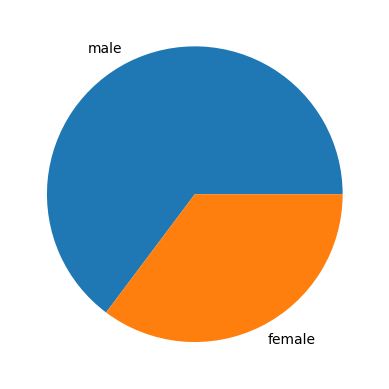

In [43]:
plt.pie(tmp.values,labels=tmp.index)

,name,val,ratio
0,male,577,64.76
1,female,314,35.24


([<matplotlib.patches.Wedge at 0x21095594690>,
 [Text(-0.4919454136803954, 0.9838646807152012, ''),
  Text(0.4919455057964525, -0.9838646346559433, '')])

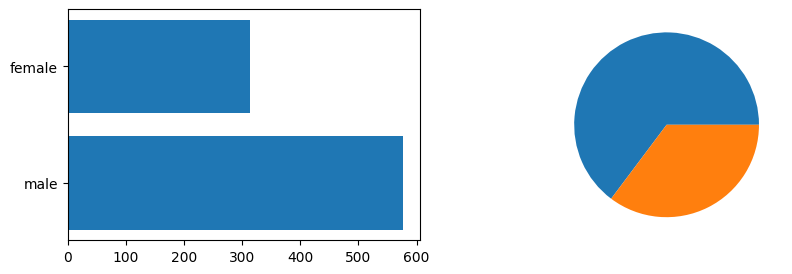

In [44]:
# 함수화

field = 'Sex'
tmp = titanic_df[field].value_counts()
ratio = [round(x/tmp.sum()*100,2) for x in tmp]
display(pd.DataFrame({'name':tmp.index,'val':tmp.values,'ratio':ratio}))
plt.figure(figsize=(10,3))
plt.subplot(1,2,1)
plt.barh(tmp.index,tmp.values)
plt.subplot(1,2,2)
plt.pie(tmp.values)

In [45]:
titanic_df['Cabin'].str[:1]

0      N
1      C
2      N
3      C
4      N
      ..
886    N
887    B
888    N
889    C
890    N
Name: Cabin, Length: 891, dtype: object

<Axes: xlabel='Sex', ylabel='Survived'>

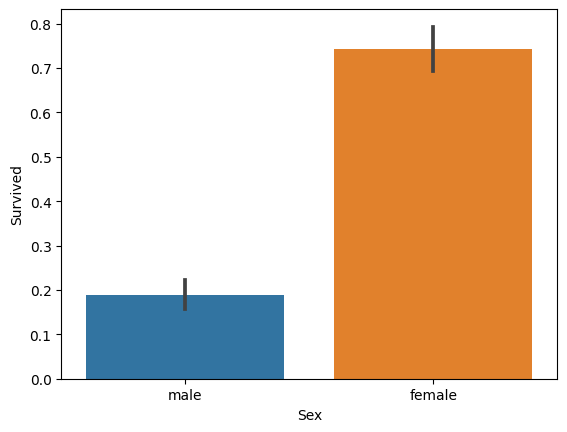

In [46]:
# 생존 1 사망0
sns.barplot(x='Sex',y='Survived',data=titanic_df)

<Axes: xlabel='Pclass', ylabel='Survived'>

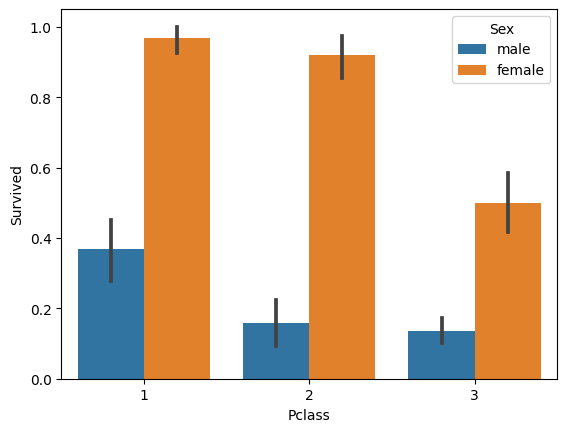

In [47]:
# Pclass별, 성별별 생존비율

sns.barplot(x='Pclass',y='Survived',hue='Sex',data=titanic_df)

In [48]:
# 산점도 차트 그려야함
# 숫자형 다 제작해야함
# 데이터의 분포도의 범위를 알아야함

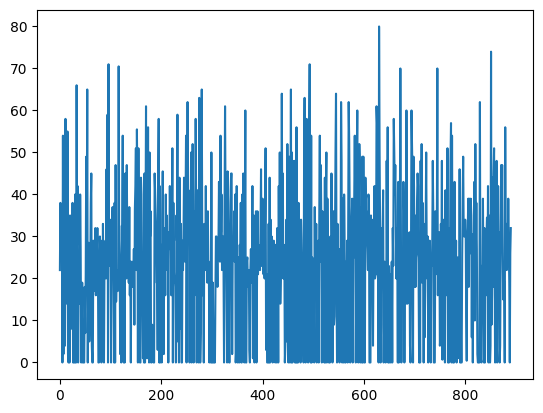

In [49]:
# plot은 선으로

plt.plot(titanic_df['Age'])

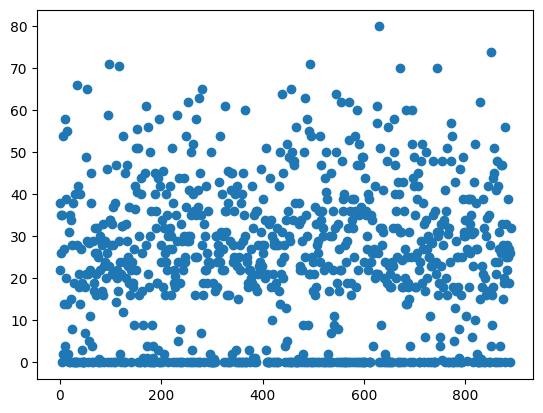

In [50]:
# min 0 에서 max 80까지 있음
# titanic_df.index값은 단순 번호값이지만 의미가 있을 때도 있음

plt.scatter(titanic_df.index,titanic_df['Age'])

In [51]:
# df.dtypes

titanic_df.dtypes 

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [52]:
titanic_df.dtypes.index , titanic_df.dtypes.values

(Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
        'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
       dtype='object'),
 array([dtype('int64'), dtype('int64'), dtype('int64'), dtype('O'),
        dtype('O'), dtype('float64'), dtype('int64'), dtype('int64'),
        dtype('O'), dtype('float64'), dtype('O'), dtype('O')], dtype=object))

In [54]:
# 선실 등급별, 구조 우선 대상이 아닌 성별로 구분하였을때

AgeStart , AgeEnd = 15,40

tmp1 = titanic_df[(titanic_df['Pclass'] == 1) & (titanic_df['Sex'] == 'male') & (titanic_df['Age']>AgeStart ) & (titanic_df['Age']<AgeEnd )]
tmp2 = titanic_df[(titanic_df['Pclass'] == 2) & (titanic_df['Sex'] == 'male') & (titanic_df['Age']>AgeStart ) & (titanic_df['Age']<AgeEnd )]
tmp3 = titanic_df[(titanic_df['Pclass'] == 3) & (titanic_df['Sex'] == 'male') & (titanic_df['Age']>AgeStart ) & (titanic_df['Age']<AgeEnd )]

In [55]:
tmp3

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,N,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,N,S
12,13,0,3,"Saundercock, Mr. William Henry",male,20.0,0,0,A/5. 2151,8.0500,N,S
13,14,0,3,"Andersson, Mr. Anders Johan",male,39.0,1,5,347082,31.2750,N,S
37,38,0,3,"Cann, Mr. Ernest Charles",male,21.0,0,0,A./5. 2152,8.0500,N,S
...,...,...,...,...,...,...,...,...,...,...,...,...
876,877,0,3,"Gustafsson, Mr. Alfred Ossian",male,20.0,0,0,7534,9.8458,N,S
877,878,0,3,"Petroff, Mr. Nedelio",male,19.0,0,0,349212,7.8958,N,S
881,882,0,3,"Markun, Mr. Johann",male,33.0,0,0,349257,7.8958,N,S
884,885,0,3,"Sutehall, Mr. Henry Jr",male,25.0,0,0,SOTON/OQ 392076,7.0500,N,S


In [56]:
# 젊은 남성은 선실 등급이 내려갈수록 많이 사망함

tmp1['Survived'].value_counts()

Survived
0    23
1    22
Name: count, dtype: int64

In [57]:
tmp2['Survived'].value_counts()

Survived
0    65
1     4
Name: count, dtype: int64

In [58]:
tmp3['Survived'].value_counts()

Survived
0    163
1     27
Name: count, dtype: int64

In [63]:
titanic_df['Survived'].value_counts()

Survived
0    549
1    342
Name: count, dtype: int64

In [64]:
pd.DataFrame({'all':titanic_df['Survived'].value_counts(),
              'pclass_1':tmp1['Survived'].value_counts(),
              'pclass_2':tmp2['Survived'].value_counts(),
              'pclass_3':tmp3['Survived'].value_counts()})

,all,pclass_1,pclass_2,pclass_3
Survived,,,,
0,549,1,4,32
1,342,53,44,30


In [65]:
# 여성은 덜함

AgeStart , AgeEnd = 15,40
find = 'female'

tmp1 = titanic_df[(titanic_df['Pclass'] == 1) & (titanic_df['Sex'] == find) & (titanic_df['Age']>AgeStart ) & (titanic_df['Age']<AgeEnd )]
tmp2 = titanic_df[(titanic_df['Pclass'] == 2) & (titanic_df['Sex'] == find) & (titanic_df['Age']>AgeStart ) & (titanic_df['Age']<AgeEnd )]
tmp3 = titanic_df[(titanic_df['Pclass'] == 3) & (titanic_df['Sex'] == find) & (titanic_df['Age']>AgeStart ) & (titanic_df['Age']<AgeEnd )]

In [66]:
pd.DataFrame({'all':titanic_df['Survived'].value_counts(),
              'pclass_1':tmp1['Survived'].value_counts(),
              'pclass_2':tmp2['Survived'].value_counts(),
              'pclass_3':tmp3['Survived'].value_counts()})

,all,pclass_1,pclass_2,pclass_3
Survived,,,,
0,549,1,4,32
1,342,53,44,30


In [67]:
from sklearn import preprocessing

def encode_features(dataDF):

    # LabelEncoding 해줌
    features = ['Cabin', 'Sex', 'Embarked']
    for feature in features:
        le = preprocessing.LabelEncoder()

        # df fit 하고
        le = le.fit(dataDF[feature])

        # df transform 함
        dataDF[feature] = le.transform(dataDF[feature])
        
    return dataDF

titanic_df = encode_features(titanic_df)
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,146,3
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,81,0
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,146,3
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,55,3
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,146,3


In [196]:
# https://github.com/wikibook/pymlrev2/blob/main/2%EC%9E%A5/2.6%20%EC%82%AC%EC%9D%B4%ED%82%B7%EB%9F%B0%EC%9C%BC%EB%A1%9C%20%EC%88%98%ED%96%89%ED%95%98%EB%8A%94%20%ED%83%80%EC%9D%B4%ED%83%80%EB%8B%89%20%EC%83%9D%EC%A1%B4%EC%9E%90%20%EC%98%88%EC%B8%A1%20.ipynb
# 참고


In [68]:
from sklearn.preprocessing import LabelEncoder

# fillna() Nan값 채워주기
# Null 처리 함수

def fillna(df):
    df['Age'].fillna(df['Age'].mean(), inplace=True)
    df['Cabin'].fillna('N', inplace=True)
    df['Embarked'].fillna('N', inplace=True)
    df['Fare'].fillna(0, inplace=True)
    return df

# 머신러닝 알고리즘에 불필요한 피처 제거
def drop_features(df):
    df.drop(['PassengerId', 'Name', 'Ticket'], axis=1, inplace=True)
    return df

# 레이블 인코딩 수행.
def format_features(df):
    df['Cabin'] = df['Cabin'].str[:1]
    features = ['Cabin', 'Sex', 'Embarked']
    for feature in features:
        le = LabelEncoder()
        le = le.fit(df[feature])
        df[feature] = le.transform(df[feature])
    return df

# 앞에서 설정한 데이터 전처리 함수 호출
def transform_features(df):
    df = fillna(df)
    df = drop_features(df)
    df = format_features(df)
    return df

In [69]:
# 원본 데이터를 재로딩 하고, feature데이터 셋과 Label 데이터 셋 추출. 
titanic_df = pd.read_csv('./titanic_train.csv')
y_titanic_df = titanic_df['Survived']
X_titanic_df= titanic_df.drop('Survived',axis=1)

X_titanic_df = transform_features(X_titanic_df)

In [70]:
X_titanic_df[:10]

,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,3,1,22.000000,1,0,7.2500,7,3
1,1,0,38.000000,1,0,71.2833,2,0
2,3,0,26.000000,0,0,7.9250,7,3
3,1,0,35.000000,1,0,53.1000,2,3
4,3,1,35.000000,0,0,8.0500,7,3
5,3,1,29.699118,0,0,8.4583,7,2
6,1,1,54.000000,0,0,51.8625,4,3
7,3,1,2.000000,3,1,21.0750,7,3
8,3,0,27.000000,0,2,11.1333,7,3
9,2,0,14.000000,1,0,30.0708,7,0


In [71]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test=train_test_split(X_titanic_df, y_titanic_df, \
                                                  test_size=0.2, random_state=11)

In [72]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# 결정트리, Random Forest, 로지스틱 회귀를 위한 사이킷런 Classifier 클래스 생성
dt_clf = DecisionTreeClassifier(random_state=11)
rf_clf = RandomForestClassifier(random_state=11)
lr_clf = LogisticRegression(solver='liblinear')

# DecisionTreeClassifier 학습/예측/평가
dt_clf.fit(X_train , y_train)
dt_pred = dt_clf.predict(X_test)
print('DecisionTreeClassifier 정확도: {0:.4f}'.format(accuracy_score(y_test, dt_pred)))

# RandomForestClassifier 학습/예측/평가
rf_clf.fit(X_train , y_train)
rf_pred = rf_clf.predict(X_test)
print('RandomForestClassifier 정확도:{0:.4f}'.format(accuracy_score(y_test, rf_pred)))

# LogisticRegression 학습/예측/평가
lr_clf.fit(X_train , y_train)
lr_pred = lr_clf.predict(X_test)
print('LogisticRegression 정확도: {0:.4f}'.format(accuracy_score(y_test, lr_pred)))

DecisionTreeClassifier 정확도: 0.7877
RandomForestClassifier 정확도:0.8547
LogisticRegression 정확도: 0.8659


In [73]:
from sklearn.model_selection import KFold

def exec_kfold(clf, folds=5):
    # 폴드 세트를 5개인 KFold객체를 생성, 폴드 수만큼 예측결과 저장을 위한  리스트 객체 생성.
    kfold = KFold(n_splits=folds)
    scores = []
    
    # KFold 교차 검증 수행. 
    for iter_count , (train_index, test_index) in enumerate(kfold.split(X_titanic_df)):
        # X_titanic_df 데이터에서 교차 검증별로 학습과 검증 데이터를 가리키는 index 생성
        X_train, X_test = X_titanic_df.values[train_index], X_titanic_df.values[test_index]
        y_train, y_test = y_titanic_df.values[train_index], y_titanic_df.values[test_index]
        
        # Classifier 학습, 예측, 정확도 계산 
        clf.fit(X_train, y_train) 
        predictions = clf.predict(X_test)
        accuracy = accuracy_score(y_test, predictions)
        scores.append(accuracy)
        print("교차 검증 {0} 정확도: {1:.4f}".format(iter_count, accuracy))     
    
    # 5개 fold에서의 평균 정확도 계산. 
    mean_score = np.mean(scores)
    print("평균 정확도: {0:.4f}".format(mean_score)) 
# exec_kfold 호출
exec_kfold(dt_clf , folds=5) 

교차 검증 0 정확도: 0.7542
교차 검증 1 정확도: 0.7809
교차 검증 2 정확도: 0.7865
교차 검증 3 정확도: 0.7697
교차 검증 4 정확도: 0.8202
평균 정확도: 0.7823


In [74]:
from sklearn.model_selection import GridSearchCV

parameters = {'max_depth':[2,3,5,10],
             'min_samples_split':[2,3,5], 'min_samples_leaf':[1,5,8]}

grid_dclf = GridSearchCV(dt_clf , param_grid=parameters , scoring='accuracy' , cv=5)
grid_dclf.fit(X_train , y_train)

print('GridSearchCV 최적 하이퍼 파라미터 :',grid_dclf.best_params_)
print('GridSearchCV 최고 정확도: {0:.4f}'.format(grid_dclf.best_score_))
best_dclf = grid_dclf.best_estimator_

# GridSearchCV의 최적 하이퍼 파라미터로 학습된 Estimator로 예측 및 평가 수행. 
dpredictions = best_dclf.predict(X_test)
accuracy = accuracy_score(y_test , dpredictions)
print('테스트 세트에서의 DecisionTreeClassifier 정확도 : {0:.4f}'.format(accuracy))

GridSearchCV 최적 하이퍼 파라미터 : {'max_depth': 3, 'min_samples_leaf': 5, 'min_samples_split': 2}
GridSearchCV 최고 정확도: 0.7992
테스트 세트에서의 DecisionTreeClassifier 정확도 : 0.8715
